In [1]:
import pandas as pd
import numpy as np
from pickle import load
from nltk.cluster import KMeansClusterer, euclidean_distance
import matplotlib.pyplot as plt
from typing import Dict

In [2]:
with open("df after category with tf after normalization.pcl","rb") as file:
    X:pd.DataFrame=load(file)

In [3]:
with open("df after category with tf.pcl", 'rb') as file:
    df: pd.DataFrame = load(file)
y=df["category"]

In [4]:
model=KMeansClusterer(4, euclidean_distance, repeats=10,avoid_empty_clusters=True)

clusters = model.cluster(X.to_numpy(), True)

In [5]:
X['cluster']=clusters
X['category']=y

In [6]:
X['cluster'].value_counts()

0    143
1     49
2      4
3      2
Name: cluster, dtype: int64

<AxesSubplot:>

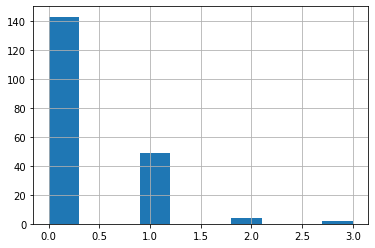

In [7]:
X['cluster'].hist()

In [11]:
new_df=X.query("cluster==0 or cluster==1")

In [12]:
len(X)-6,len(new_df)

(192, 192)

In [14]:
X=new_df.drop(columns=['category'])
y=new_df['category']

In [15]:
model=KMeansClusterer(4, euclidean_distance, repeats=10,avoid_empty_clusters=True)

clusters = model.cluster(X.to_numpy(), True)

In [17]:
cl_amount:Dict[int,int]={}
for cl in set(clusters):
    cl_amount[cl]=clusters.count(cl)

In [ ]:
print(*cl_amount.items(),sep="\n")

In [18]:
new_df['cluster']=clusters

(array([82.,  0.,  0., 61.,  0.,  0.,  0.,  0.,  0., 49.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

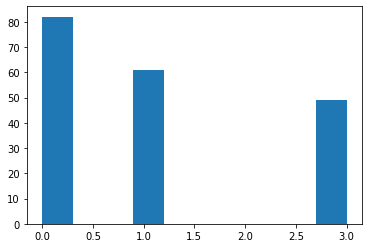

In [16]:
plt.hist(clusters)

In [21]:
new_df[new_df['cluster']==0]['category'].value_counts()

4    27
3    23
2    20
1    12
Name: category, dtype: int64